# ResNet50 Model Gebruiken
In deze notebook gaan we een pre-trained ResNet50 model door trainen met onze eigen dataset. Dit is vooral voor beginnende ML programmeurs een goed idee.

In [2]:
from IPython.display import FileLink, FileLinks
from torchvision import models, transforms
from torchvision.models import resnet50
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import torch

from transformer import ResizeWithRandomRotation

# Model Gebruiken

### Setup

In de github map models zijn verschillende ResNet50 weights toegevoegd. Deze kan je hier inladen om het model te gebruiken. **Let op** dat de `img_size` gelijk is aan waar het model op is getraint.

In [6]:
img_size = 416

In [7]:
idx_to_label = {
    0: 'Appel',
    1: 'Banaan',
    2: 'Kiwi',
    3: 'Peer',
    4: 'Tomaat',
    5: 'Sinaasappel of Mandarijn'
}

In [8]:
model_path = "..\\models\\resnet50_416.pth"

### Predict & Plot Function

In [10]:
def predict_and_plot(model_path=model_path, image_path=None, print_debug=False, idx_to_label=idx_to_label):
    num_classes = len(idx_to_label)

    # Bepaal het apparaat (GPU of CPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    if print_debug:
        print(f"Device selected: {device}")
    
    # Laad het basis-ResNet50-model
    model = models.resnet50(weights=None)

    # Pas de fc-laag aan - om error te voorkomen
    model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

    # Laad de gewichten in het model
    if model_path:
        model.load_state_dict(torch.load(model_path))
        model.eval()
    else:
        return "Geen model gekozen"

    preprocess = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        ResizeWithRandomRotation(img_size, 0),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Laad de afbeelding en pas de transformaties toe
    if image_path:
        image = Image.open(image_path)
        input_tensor = preprocess(image)
        input_batch = input_tensor.unsqueeze(0)
    else:
        return "Geen afbeelding gekozen"
    
    # Voer de afbeelding door het model om voorspellingen te maken
    with torch.no_grad():
        output = model(input_batch)
    
    #  Interpreteer de voorspellingen
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    predicted_index = probabilities.argmax().item()
    predicted_label = idx_to_label.get(predicted_index, "Onbekend")
    
    # Debug info
    if print_debug:
        print(f"Predicted class index: {predicted_index}")
        print(f"Predicted label: {predicted_label}")
        print(f"Probabilities: {probabilities.tolist()}")

    # Stap 8: Plot de afbeelding
    plt.imshow(image)
    plt.title(f"Voorspelling: {predicted_label}")
    plt.axis('off')
    plt.show()

### Usage

Voeg afbeeldingen die je wilt voorspellen toe aan de `image_paths` lijst.

In [13]:
image_paths = ["..\\images\\266.jpeg"] # Banaan EXTRA AFBEELDINGEN TOEVOEGEN

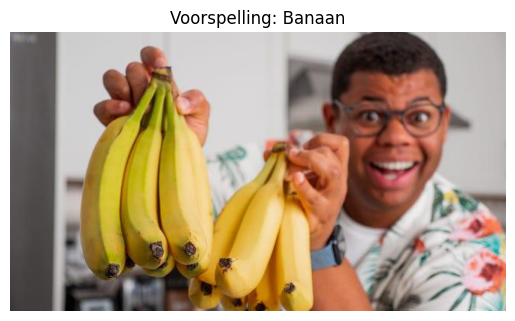

In [14]:
for image_path in image_paths:
    predict_and_plot(model_path, image_path) # als je de waardes wilt zien voeg toe: `, print_debug=True`

Bekijk onderstaande notebook om te zien hoe dit model is getraind.

In [16]:
FileLink('ResNet50_model_trainen.ipynb')

E:\Studie\Stage\Computer-Vision-Showcase-SUPERP\code\ResNet50_model_trainen.ipynb

Voor meer informatie over het train proces bekijk onderstaande notebook.

In [18]:
FileLink('..\\informatie\\Model Trainen.ipynb')

E:\Studie\Stage\Computer-Vision-Showcase-SUPERP\informatie\Model Trainen.ipynb